# Example 1.1

### El problema

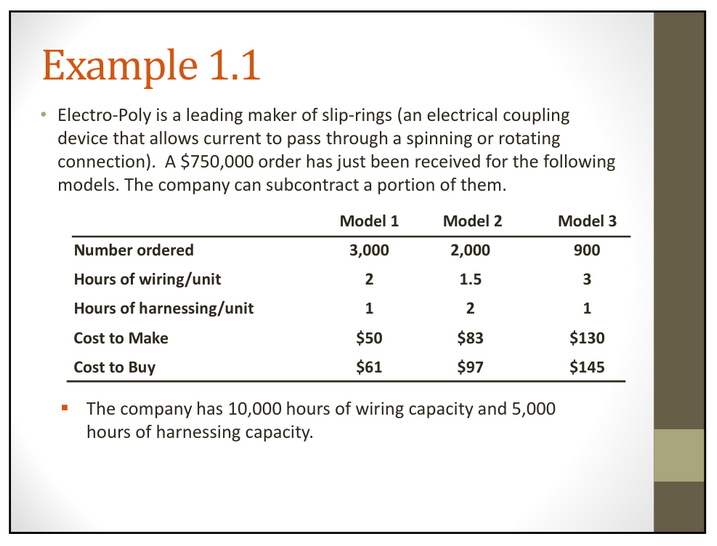

### Model

- Decision variables:
    - $M_i, B_i \; i\in \{1,2,3\}$. Where $M$ designate the number of made rings, and $B$ designates the number of bought rings.

- Objective Function:
    $$
    \min: 50M_1 + 83M_2 + 130M_3 + 61B_1 + 97B_2 + 145B_3
    $$

- Restrinctions:
$$
M_1 + B_1 = 3000
$$

$$
M_2 + B_2 = 2000
$$

$$
M_3 + B_3 = 900
$$

$$
2M_1 + 1.5M_2 + 3M_3 \leq 10,000
$$

$$
M_1 + 2M_2 + M_3 \leq 5,000
$$



#### lpsolve55

In [2]:
import numpy as np
from lpsolve55 import *

In [3]:
#Asignamos un nombre al modelo
model = lpsolve('make_lp', 0, 6)

# Determinamos como se comunica lpsolve (los mensajes)
lpsolve('set_verbose', model, NORMAL)

# Establecemos la función objetivo
ret = lpsolve('set_obj_fn', model, [50, 83, 130, 61, 97, 145])

# Establecemos que la función objetivo hay que minimizarla
ret = lpsolve('set_minim', model)

# Añadimos constrictions
ret = lpsolve('add_constraint', model, [1, 0, 0, 1, 0, 0], 'EQ', 3000)
ret = lpsolve('add_constraint', model, [0, 1, 0, 0, 1, 0], 'EQ', 2000)
ret = lpsolve('add_constraint', model, [0, 0, 1, 0, 0, 1], 'EQ',  900)
ret = lpsolve('add_constraint', model, [2, 1.5, 3, 0, 0, 0], 'LE', 10000)
ret = lpsolve('add_constraint', model, [1, 2, 1, 0, 0, 0], 'LE', 5000)

# Por defecto, las 'lower bounds' están setteadas como 0 para todas las variables.
# Esto puede modificarse con 'set_lowbo(...)'

# Podemos escribir el modelo en un archivo
ret = lpsolve('write_lp', model, 'ex11.lp')

# Ejecutamos el solver
ret = lpsolve('solve', model)


Model name:  '' - run #1    
Objective:   Minimize(R0)
 
SUBMITTED
Model size:        5 constraints,       6 variables,           12 non-zeros.
Sets:                                   0 GUB,                  0 SOS.
 
Using DUAL simplex for phase 1 and PRIMAL simplex for phase 2.
The primal and dual simplex pricing strategy set to 'Devex'.
 
 
Optimal solution              453300 after          4 iter.

Relative numeric accuracy ||*|| = 1.51532e-16

 MEMO: lp_solve version 5.5.2.5 for 64 bit OS, with 64 bit REAL variables.
      In the total iteration count 4, 0 (0.0%) were bound flips.
      There were 0 refactorizations, 0 triggered by time and 0 by density.
       ... on average 4.0 major pivots per refactorization.
      The largest [LUSOL v2.2.1.0] fact(B) had 6 NZ entries, 1.0x largest basis.
      The constraint matrix inf-norm is 3, with a dynamic range of 3.
      Time to load data was 0.002 seconds, presolve used 0.001 seconds,
       ... 0.001 seconds in simplex solver, in t

In [7]:
solution = {}
solution['objective']= lpsolve('get_objective', model)
solution['variables'] = lpsolve('get_variables', model)[0] # También devuelve otro parámetro relacionado con el estado de las variables (no interesa)


In [8]:
solution['variables']

[2999.9999999999995, 550.0000000000002, 900.0, 0.0, 1449.9999999999998, 0.0]